In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Tiedostojen avaaminen
elisa = pd.read_csv('http://taanila.fi/ELISA-2016-01-01-2018-10-19.csv', sep = ';', decimal = ',', 
                  skiprows = 1, usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
telia = pd.read_csv('http://taanila.fi/TELIA1-2016-01-01-2018-10-19.csv', sep = ';', decimal = ',', 
                  skiprows = 1, usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

#Aikaleimat indeksiksi
elisa.index = pd.to_datetime(elisa['Date'])
#Lajittelu vanhimmasta uusimpaan
elisa.sort_index(inplace = True)

telia.index = pd.to_datetime(telia['Date'])
telia.sort_index(inplace = True)

In [4]:
elisa.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,,
2016-01-04,2016-01-04,34.00,34.03,34.44,34.44,33.66,33.91,33.944,367731,12482122.90,1605
2016-01-05,2016-01-05,33.79,33.80,34.15,34.29,33.71,33.87,33.899,226342,7672788.44,1788
2016-01-07,2016-01-07,34.49,34.50,33.03,34.84,32.81,34.43,33.880,785910,26628106.48,4041
2016-01-08,2016-01-08,34.69,34.72,34.43,35.15,34.27,34.72,34.783,390665,13588936.49,2394
2016-01-11,2016-01-11,34.78,34.81,34.61,34.85,34.12,34.70,34.622,387257,13407526.32,2337


In [5]:
telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,,
2016-01-04,2016-01-04,4.386,4.390,4.522,4.522,4.386,4.398,4.418,2152693,9511279.53,3707
2016-01-05,2016-01-05,4.366,4.372,4.420,4.420,4.324,4.370,4.360,2047906,8927924.10,3202
2016-01-07,2016-01-07,4.262,4.268,4.256,4.304,4.124,4.274,4.179,4150528,17343276.29,5828
2016-01-08,2016-01-08,4.324,4.330,4.332,4.426,4.300,4.328,4.363,1109210,4839601.49,1158
2016-01-11,2016-01-11,4.312,4.318,4.350,4.368,4.304,4.322,4.340,1354831,5879584.91,1208


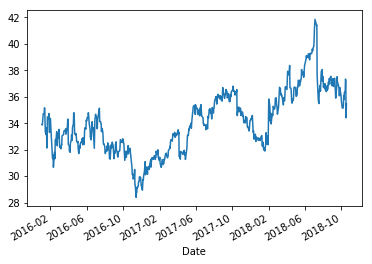

In [6]:
elisa['Closing price'].plot()

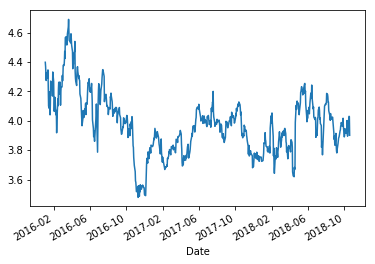

In [7]:
telia['Closing price'].plot()

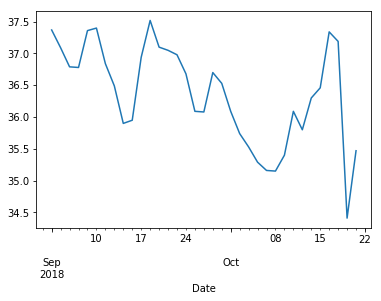

In [8]:
#Syyskuusta alkaen
elisa['Closing price']['2018-09':].plot()

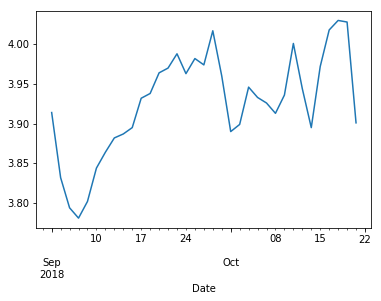

In [9]:
telia['Closing price']['2018-09':].plot()

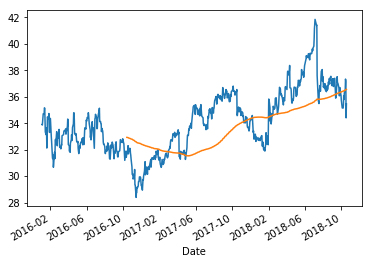

In [10]:
elisa['Closing price'].plot()
#Liukuva keskiarvo
elisa['Closing price'].rolling(200).mean().plot()

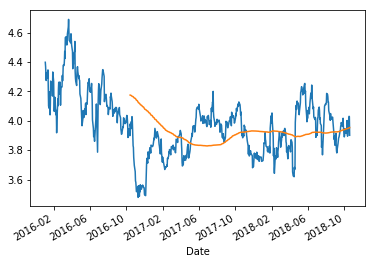

In [11]:
telia['Closing price'].plot()
telia['Closing price'].rolling(200).mean().plot()

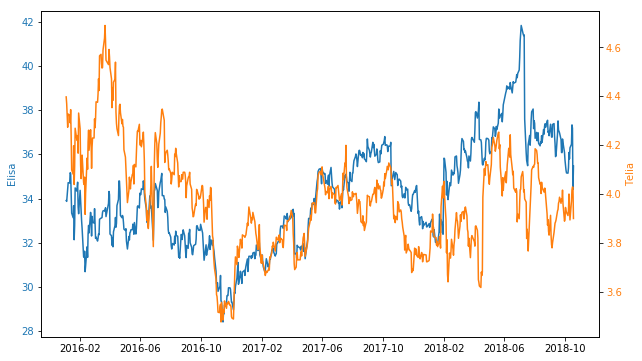

In [12]:
#Kaksi eri suuruusluokan arvoja sisältävää aikasarjaa samaan kaavioon

fig, ax1 = plt.subplots(figsize = (10, 6))

color = 'C0'
ax1.set_ylabel('Elisa', color=color)
ax1.plot(elisa['Closing price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'C1'
ax2.set_ylabel('Telia', color=color)
ax2.plot(telia['Closing price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [13]:
#Prosenttimuutokset
elisa['Elisa_Change'] = elisa['Closing price'].pct_change()
elisa.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Elisa_Change
Date,,,,,,,,,,,,
2016-01-04,2016-01-04,34.00,34.03,34.44,34.44,33.66,33.91,33.944,367731,12482122.90,1605,NaN
2016-01-05,2016-01-05,33.79,33.80,34.15,34.29,33.71,33.87,33.899,226342,7672788.44,1788,-0.001180
2016-01-07,2016-01-07,34.49,34.50,33.03,34.84,32.81,34.43,33.880,785910,26628106.48,4041,0.016534
2016-01-08,2016-01-08,34.69,34.72,34.43,35.15,34.27,34.72,34.783,390665,13588936.49,2394,0.008423
2016-01-11,2016-01-11,34.78,34.81,34.61,34.85,34.12,34.70,34.622,387257,13407526.32,2337,-0.000576


In [14]:
telia['Telia_Change'] = telia['Closing price'].pct_change()
telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Telia_Change
Date,,,,,,,,,,,,
2016-01-04,2016-01-04,4.386,4.390,4.522,4.522,4.386,4.398,4.418,2152693,9511279.53,3707,NaN
2016-01-05,2016-01-05,4.366,4.372,4.420,4.420,4.324,4.370,4.360,2047906,8927924.10,3202,-0.006367
2016-01-07,2016-01-07,4.262,4.268,4.256,4.304,4.124,4.274,4.179,4150528,17343276.29,5828,-0.021968
2016-01-08,2016-01-08,4.324,4.330,4.332,4.426,4.300,4.328,4.363,1109210,4839601.49,1158,0.012635
2016-01-11,2016-01-11,4.312,4.318,4.350,4.368,4.304,4.322,4.340,1354831,5879584.91,1208,-0.001386


In [15]:
#concat yhdistää samaan dataframeen
muutokset = pd.concat([elisa['Elisa_Change'], telia['Telia_Change']], axis=1)
muutokset.head()

,Elisa_Change,Telia_Change
Date,,
2016-01-04,NaN,NaN
2016-01-05,-0.001180,-0.006367
2016-01-07,0.016534,-0.021968
2016-01-08,0.008423,0.012635
2016-01-11,-0.000576,-0.001386


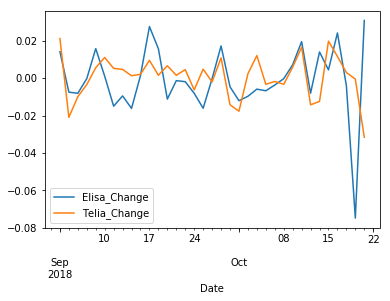

In [16]:
muutokset['2018-09':].plot()

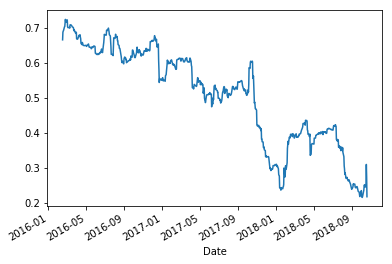

In [17]:
#Liukuva korrelaatio
korrelaatio=muutokset['Elisa_Change'].rolling(125, 
    min_periods=30).corr(muutokset['Telia_Change'])
korrelaatio.plot()

In [18]:
#Viikonpäivät omaan sarakkeeseen (0=maanantai)
muutokset['Weekday'] = muutokset.index.weekday
muutokset['Elisa_Change'].groupby(muutokset['Weekday']).describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,138.0,0.000619,0.012689,-0.046049,-0.005533,0.000000,0.006150,0.034566
1,143.0,0.000147,0.010635,-0.029270,-0.007786,0.000307,0.006048,0.029586
2,144.0,-0.000020,0.012898,-0.053899,-0.005627,-0.000335,0.005545,0.058061
3,143.0,0.000216,0.013489,-0.074751,-0.006484,0.001081,0.007788,0.045826
4,139.0,-0.000202,0.015654,-0.092226,-0.005741,0.001112,0.007559,0.051540


In [19]:
muutokset['Telia_Change'].groupby(muutokset['Weekday']).describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,138.0,-0.000202,0.014655,-0.079728,-0.007093,-0.000807,0.007725,0.036359
1,143.0,-0.000005,0.011809,-0.037550,-0.006446,-0.000490,0.006297,0.048600
2,144.0,-0.000455,0.012118,-0.044934,-0.006287,-0.001514,0.005611,0.042407
3,143.0,-0.000625,0.011510,-0.037346,-0.007129,0.000443,0.006814,0.021917
4,139.0,0.000883,0.014443,-0.032106,-0.006412,-0.000470,0.007290,0.083107
